In [2]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
%matplotlib inline

### Steps:
- Face detection
- Landmark detection
- Warping triangles
- seamless cloning
- optical flow

In [3]:
img = cv2.imread('pic.jpg')

### Face detection & landmarks

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [5]:
faces = detector(img)   #Returns list of rectangle objects
face = faces[0]    #Single face

In [6]:
#(x,y,w,h) = [face.left(), face.top(), face.right() - x, face.bottom() - y]   #Get coordinates of face
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,255), 2))

In [7]:
landmarks = predictor(img,face)   #Returns landmarks object with parts().x and parts().y
points = [(p.x,p.y) for p in landmarks.parts()]

In [8]:
# for (x, y) in points:
#     cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
# plt.figure(figsize=(10,10))
# plt.imshow(img)

### Convex Hull

In [9]:
hull = cv2.convexHull(np.array(points), returnPoints=False)
hull_points = [points[i] for i in list(hull.reshape(-1,))]

In [10]:
# for (x, y) in hull_points:
#     cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
# plt.figure(figsize=(10,10))
# plt.imshow(img)

In [11]:
mouth_points = [[60],[61],[62],[63],[64],[65],[66],[67]]
hull = np.concatenate([hull, mouth_points])

### Triangulation

In [12]:
#rect = (0,0,img.shape[1],img.shape[0])
#subdiv = cv2.Subdiv2D(rect)
#subdiv.insert(hull) - DO NOT RUN

subdiv2d causing kernel to die!!! Scipy option for triangulation

In [64]:
ssss = np.array([list(i) for i in points])

In [65]:
tri = Delaunay(ssss)

In [51]:
len(np.unique(tri.simplices.copy().flatten()))

66

In [62]:
len(ssss)

68

ValueError: x and y must be equal-length 1-D arrays

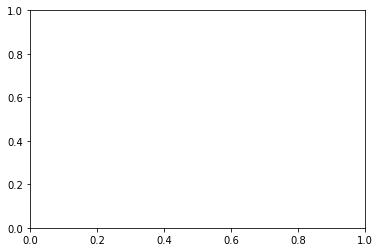

In [66]:
import matplotlib.pyplot as plt
plt.triplot(ssss[:,0][0], ssss[:,1][0], tri.simplices.copy()[0])
plt.plot(ssss[:,0], ssss[:,1], 'o')
plt.show()

In [52]:
tri.simplices.copy()

array([[48,  5,  4],
       [48,  6,  5],
       [ 9, 55, 10],
       [15, 45, 16],
       [14, 35, 46],
       [45, 14, 46],
       [14, 45, 15],
       [14, 15, 16],
       [ 3, 48,  4],
       [48,  3,  2],
       [55, 54, 10],
       [12, 54, 13],
       [54, 14, 13],
       [14, 54, 35],
       [ 8, 57,  9],
       [35, 47, 46],
       [42, 47, 35],
       [42, 27, 22],
       [ 1,  2,  0],
       [36,  1,  0],
       [17, 36,  0],
       [31, 48,  2],
       [31, 60, 48],
       [26, 25, 16],
       [45, 26, 16],
       [26, 45, 25],
       [54, 11, 10],
       [11, 54, 12],
       [54, 53, 35],
       [28, 27, 42],
       [30, 42, 35],
       [34, 30, 35],
       [30, 34, 33],
       [32, 30, 33],
       [31, 30, 32],
       [56, 55,  9],
       [57, 56,  9],
       [56, 53, 55],
       [58,  8,  7],
       [58, 57,  8],
       [27, 21, 22],
       [17, 18, 36],
       [18, 37, 36],
       [37, 18, 19],
       [31, 41, 40],
       [41, 37, 40],
       [37, 41, 36],
       [41, 3